In [422]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv


### Step 1: Load the Data
• Import the necessary libraries (pandas, numpy, matplotlib, seaborn, etc.).
• Load the dataset into a pandas DataFrame using pd.read_csv().
• Display the first few rows of the dataset using .head().

In [423]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [424]:
df=pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


### Step 2: Understand the Data
1. Check the shape of the dataset using .shape to see the number of rows and columns.
2. Display the column names using .columns.
3. Use .info() to examine the data types and the number of non-null values in each column.
4. Use .describe() to get a summary of numeric columns (mean, min, max, standard deviation).

In [425]:
print("Shape of dataset",df.shape)
print("Column Names:",df.columns)

Shape of dataset (10000, 12)
Column Names: Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [426]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
count,9976.000000,9977.000000,9975.000000,9976.000000,9977.000000,9981.000000
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,71.000000,72.500000,67.000000,268.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000


### Step 3: Identify Missing Values
1. Check for missing values using .isnull().sum().
2. Visualize missing data using a heatmap (sns.heatmap) to see patterns of missingness.
3. Decide how to handle missing values:
o For numeric columns, use mean or median imputation.
o For categorical columns, use mode imputation or a placeholder (e.g., "Unknown").

In [427]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

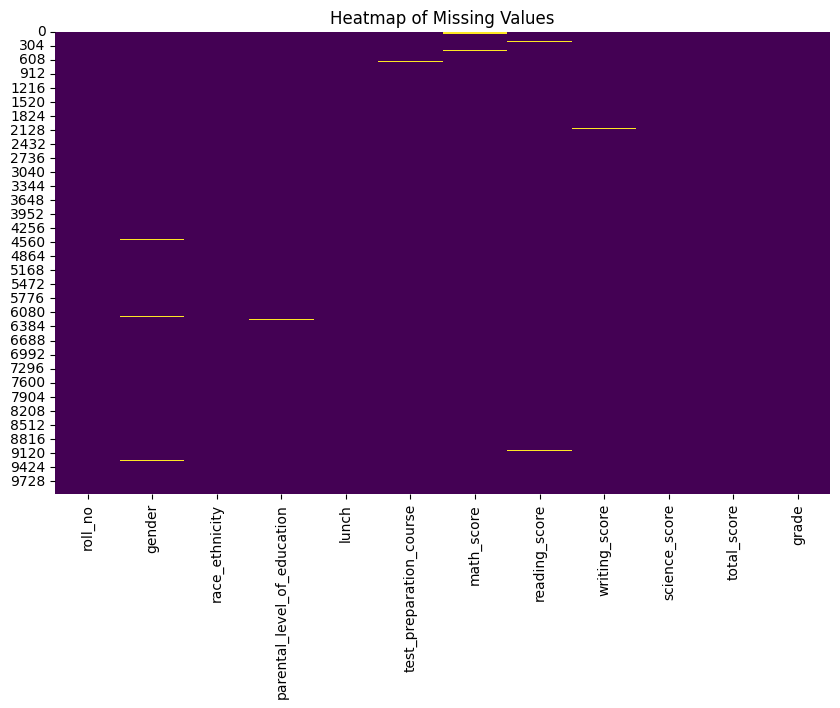

In [428]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

In [429]:
#For numeric column
# Ensure numeric types
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['reading_score'] = pd.to_numeric(df['reading_score'], errors='coerce')
df['writing_score'] = pd.to_numeric(df['writing_score'], errors='coerce')
df['science_score'] = pd.to_numeric(df['science_score'], errors='coerce')
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')
df['lunch'] = pd.to_numeric(df['lunch'], errors='coerce')
df['test_preparation_course'] = pd.to_numeric(df['test_preparation_course'], errors='coerce')


In [430]:
# Fill NaN values with the mean
df['math_score'] = df['math_score'].fillna(df['math_score'].mean())
df['reading_score'] = df['reading_score'].fillna(df['reading_score'].mean())
df['writing_score'] = df['writing_score'].fillna(df['writing_score'].mean())
df['science_score'] = df['science_score'].fillna(df['science_score'].mean())
df['total_score'] = df['total_score'].fillna(df['total_score'].mean())
df['lunch'] = df['lunch'].fillna(df['lunch'].mean())
df['test_preparation_course'] = df['test_preparation_course'].fillna(df['test_preparation_course'].mean())

print("Filled missing values successfully!")

Filled missing values successfully!


In [431]:
#For Categorical column
df.fillna({'gender': 'Unknown'}, inplace=True)
df.fillna({'race_ethnicity': 'Unknown'}, inplace=True)
df.fillna({'parental_level_of_education': 'Unknown'}, inplace=True)
df.fillna({'grade': 'Unknown'}, inplace=True)
df.head(10) #to check whether handling missing values

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.000000,1.0,89.0,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.000000,0.0,65.0,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.000000,0.0,10.0,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.000000,1.0,22.0,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.000000,1.0,26.0,58.0,64.0,65.0,213.0,C
5,std-06,male,group B,high school,1.000000,0.0,40.0,49.0,69.0,48.0,206.0,C
6,std-07,Unknown,group C,some college,0.000000,0.0,34.0,48.0,84.0,73.0,239.0,C
7,std-08,male,group B,associate's degree,1.000000,1.0,25.0,80.0,34.0,17.0,156.0,D
8,std-09,male,group C,Unknown,1.000000,1.0,28.0,79.0,100.0,76.0,283.0,B
9,std-10,male,group C,some high school,0.644246,0.0,71.0,22.0,85.0,39.0,217.0,C


### Step 4: Handle Duplicates
• Check for duplicate rows using .duplicated().sum().
• Drop duplicates using .drop_duplicates() if any are found.

In [432]:
num_dups = df.duplicated().sum()
print(f"Number of duplicate rows: {num_dups}")

if num_dups > 0:
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


### Step 5: Check for Inconsistent or Faulty Data
1. Examine categorical columns (gender, race_ethnicity, etc.) for typos or inconsistent values using
.unique().
2. Ensure numeric columns (math_score, total_score, etc.) contain valid numbers (e.g., no special
characters like ? or negative values).
o Convert math_score to numeric using pd.to_numeric() with errors='coerce'.
o Handle invalid entries by replacing them with NaN and imputing or dropping them.

In [433]:
print("Gender:", df['gender'].unique())
print("race_ethnicity:", df['race_ethnicity'].unique())
print("parental_level_of_education:", df['parental_level_of_education'].unique())
print("grade:", df['grade'].unique())

Gender: ['male' 'Unknown' 'Boy' '\\tmale' 'female' 'Girl']
race_ethnicity: ['group D' 'group B' 'group C' 'group E' 'group A' 'A' 'Unknown' 'C' 'D'
 'group C\\n' 'B' 'E']
parental_level_of_education: ['some college' 'high school' "master's degree" "associate's degree"
 'Unknown' 'some high school' "bachelor's degree"]
grade: ['C' 'A' 'B' 'D' 'Unknown' 'Fail']


In [434]:
# Correcting Gender
gender_mapping = {
    'male': 'Male',
    '\\tmale': 'Male',
    'Boy': 'Male',
    'female': 'Female',
    'Girl': 'Female'}
    #'Unknown': 'Unknown'}
df['gender'] = df['gender'].map(gender_mapping)


In [435]:
# Correcting race_ethnicity
race_ethnicity_mapping = {
    'group A': 'Group A',
    'group B': 'Group B',
    'group C': 'Group C',
    'group D': 'Group D',
    'group E': 'Group E',
    'A': 'Group A',
    'B': 'Group B',
    'C': 'Group C',
    'D': 'Group D',
    'E': 'Group E',
    'group C\\n': 'Group C',
}
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_mapping)


In [436]:
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df.loc[df['math_score'] < 0, 'math_score'] = np.nan

df['reading_score'] = pd.to_numeric(df['reading_score'], errors='coerce')
df.loc[df['reading_score'] < 0, 'reading_score'] = np.nan

df['writing_score'] = pd.to_numeric(df['writing_score'], errors='coerce')
df.loc[df['writing_score'] < 0, 'writing_score'] = np.nan

df['science_score'] = pd.to_numeric(df['science_score'], errors='coerce')
df.loc[df['science_score'] < 0, 'science_score'] = np.nan

df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')
df.loc[df['total_score'] < 0, 'total_score'] = np.nan

df['lunch'] = pd.to_numeric(df['lunch'], errors='coerce')
df.loc[df['lunch'] < 0, 'lunch'] = np.nan

df['test_preparation_course'] = pd.to_numeric(df['test_preparation_course'], errors='coerce')
df.loc[df['test_preparation_course'] < 0, 'test_preparation_course'] = np.nan

### Step 6: Drop Irrelevant Columns
• Decide if any columns (like roll_no) should be dropped because they do not contribute to analysis.
• Drop columns using .drop().

In [437]:
def drop_column(df, column_name):
    try:
        df.drop(column_name, axis=1, inplace=True)
        print(f"Column '{column_name}' dropped successfully.")
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame or already dropped.")
drop_column(df, 'roll_no')
print(df.columns)

Column 'roll_no' dropped successfully.
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


### Step 7: Convert Data Types
• Ensure all columns have appropriate data types:
o Convert categorical columns (e.g., gender, grade) to category using .astype('category').
o Convert scores and other numeric data to float or int as needed.

In [438]:
df['gender'] = df['gender'].astype('category')
df['grade'] = df['grade'].astype('category')
df['race_ethnicity']=df['race_ethnicity'].astype('category')
df['parental_level_of_education']=df['parental_level_of_education'].astype('category')
df['math_score'] = df['math_score'].astype(float)
df['reading_score'] = df['reading_score'].astype(float)
df['writing_score'] = df['writing_score'].astype(float)
df['science_score'] = df['science_score'].astype(float)
df['total_score'] = df['total_score'].astype(float)
df['lunch'] = df['lunch'].astype(float)
df['test_preparation_course'] = df['test_preparation_course'].astype(float)


### Step 8: Explore Distributions
1.  Use .value_counts() to explore the distribution of categorical variables (e.g., gender, grade)

2. Plot the distributions of numeric variables (math_score, reading_score, etc.) using histogr ms
(sns.histplot).
3. Use box plots (sns.boxplot) to detect outliers in numeric columns.

In [439]:
print(df['gender'].value_counts())
print(df['grade'].value_counts())
print(df['race_ethnicity'].value_counts())
print(df['parental_level_of_education'].value_counts())

gender
Female    4993
Male      4989
Name: count, dtype: int64
grade
B          5659
C          2701
A           904
D           671
Fail         62
Unknown       3
Name: count, dtype: int64
race_ethnicity
Group C    2928
Group D    2572
Group B    1900
Group E    1513
Group A    1064
Name: count, dtype: int64
parental_level_of_education
some college          2272
high school           1987
associate's degree    1905
some high school      1742
bachelor's degree     1361
master's degree        711
Unknown                 22
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


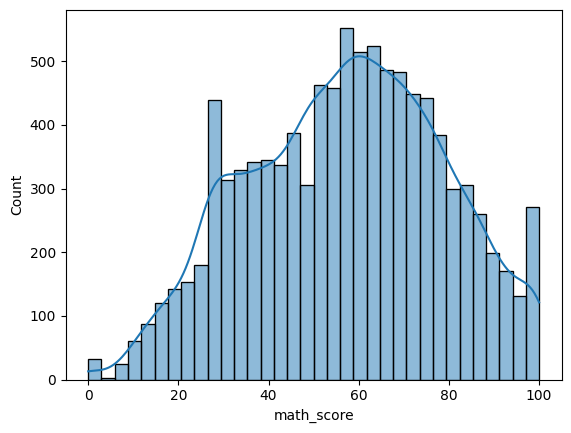

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


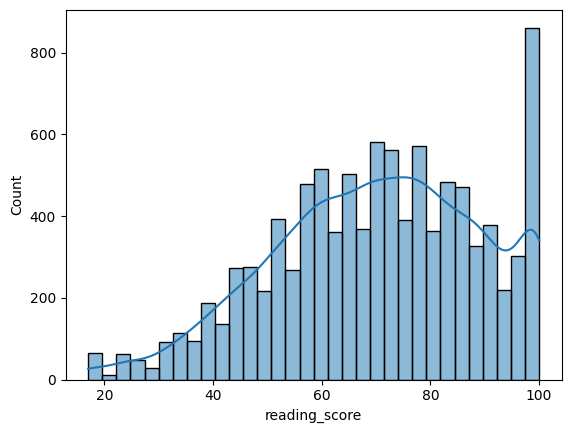

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


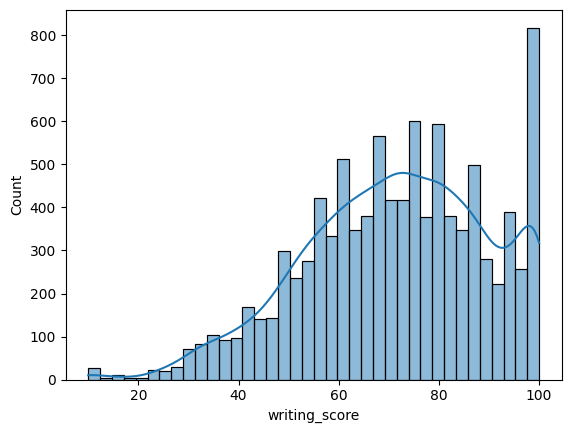

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


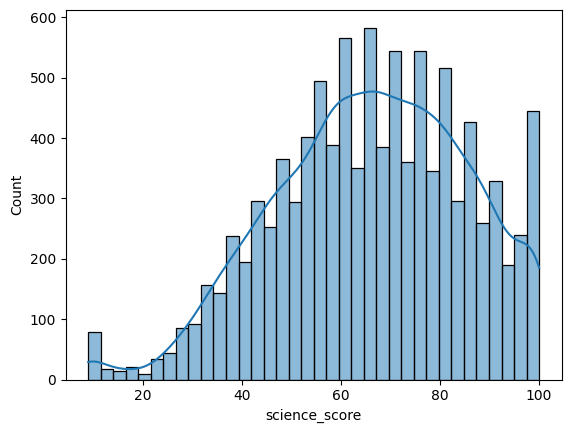

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


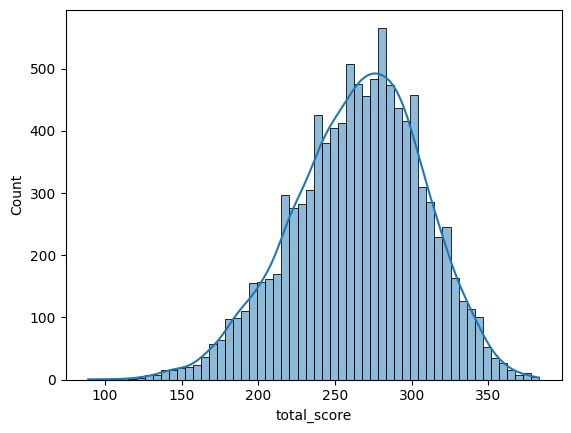

In [440]:
sns.histplot(df['math_score'], kde=True)
plt.show()
sns.histplot(df['reading_score'], kde=True)
plt.show()
sns.histplot(df['writing_score'], kde=True)
plt.show()
sns.histplot(df['science_score'], kde=True)
plt.show()
sns.histplot(df['total_score'], kde=True)
plt.show()

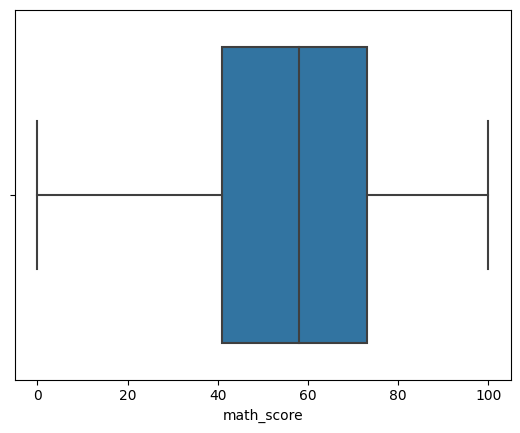

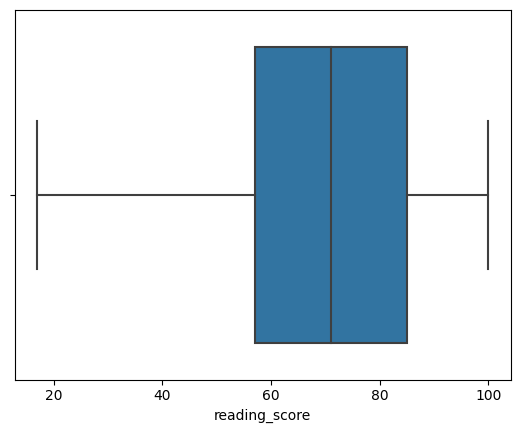

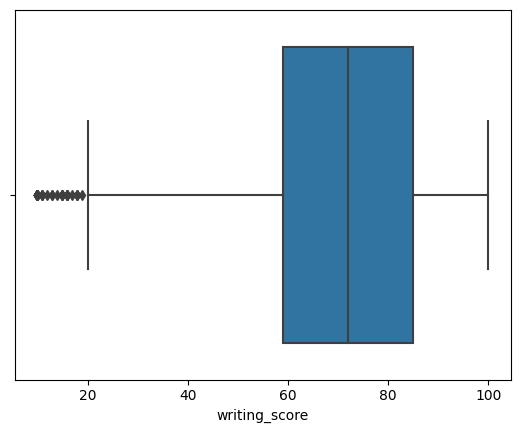

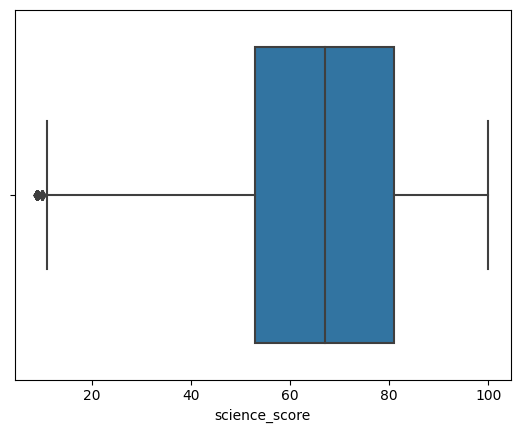

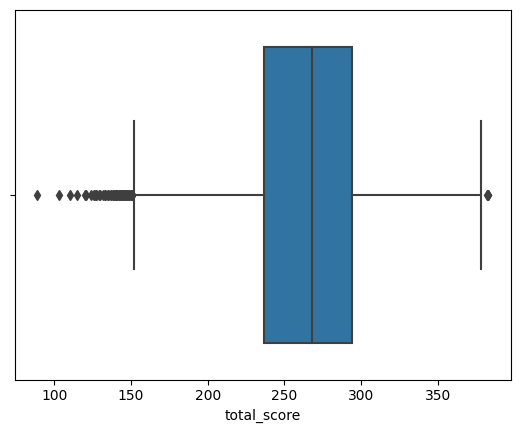

In [441]:
sns.boxplot(x=df['math_score'])
plt.show()
sns.boxplot(x=df['reading_score'])
plt.show()
sns.boxplot(x=df['writing_score'])
plt.show()
sns.boxplot(x=df['science_score'])
plt.show()
sns.boxplot(x=df['total_score'])
plt.show()

### Step 9: Handle Outliers
1. Use box plots or the Interquartile Range (IQR) method to identify outliers in numeric columns.
2. Decide whether to remove, transform, or cap outliers.

In [442]:
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['math_score'] < (Q1 - 1.5 * IQR)) | (df['math_score'] > (Q3 + 1.5 * IQR))]
print(f"Identified outliers: {outliers}")

Identified outliers: Empty DataFrame
Columns: [gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course, math_score, reading_score, writing_score, science_score, total_score, grade]
Index: []


In [443]:
Q1 = df['total_score'].quantile(0.25)
Q3 = df['total_score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_score'] < (Q1 - 1.5 * IQR)) | (df['math_score'] > (Q3 + 1.5 * IQR))]
print(f"Identified outliers: {outliers}")

Identified outliers:       gender race_ethnicity parental_level_of_education  lunch  \
129     Male        Group B             master's degree    1.0   
178     Male        Group D          associate's degree    1.0   
223     Male        Group D           bachelor's degree    1.0   
282     Male        Group D           bachelor's degree    1.0   
292     Male        Group D           bachelor's degree    1.0   
...      ...            ...                         ...    ...   
4816    Male        Group E                 high school    1.0   
4963    Male        Group E                some college    0.0   
5964  Female        Group B           bachelor's degree    1.0   
6648  Female        Group E                 high school    1.0   
8436  Female        Group C             master's degree    1.0   

      test_preparation_course  math_score  reading_score  writing_score  \
129                       0.0        32.0           48.0           51.0   
178                       0.0       

In [444]:
# # Remove outliers
# df = df[~((df['math_score'] < (Q1 - 1.5 * IQR)) | (df['math_score'] > (Q3 + 1.5 * IQR)))]
# df = df[~((df['total_score'] < (Q1 - 1.5 * IQR)) | (df['math_score'] > (Q3 + 1.5 * IQR)))]
# df = df[~((df['reading_score'] < (Q1 - 1.5 * IQR)) | (df['math_score'] > (Q3 + 1.5 * IQR)))]
# df = df[~((df['writing_score'] < (Q1 - 1.5 * IQR)) | (df['math_score'] > (Q3 + 1.5 * IQR)))]
# df = df[~((df['science_score'] < (Q1 - 1.5 * IQR)) | (df['math_score'] > (Q3 + 1.5 * IQR)))]

### Step 10: Encode Categorical Variables
1. Use one-hot encoding or label encoding to convert categorical columns into numeric formats for
analysis.
2. Use pd.get_dummies() for one-hot encoding or LabelEncoder for label encoding.

In [445]:
# df = pd.get_dummies(df, columns=['gender', 'grade','race_ethnicity','parental_level_of_education'], drop_first=True)
# df.head(5)

### Step 11: Correlation Analysis
1. Use .corr() to find correlations between numeric variables.
2. Visualize the correlation matrix using a heatmap (sns.heatmap).

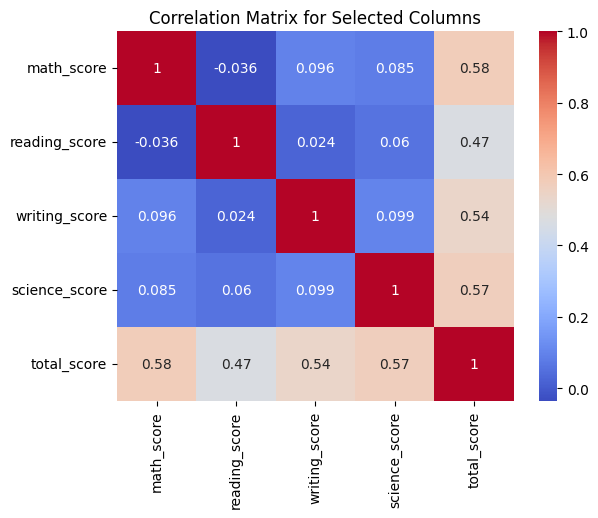

In [446]:
columns_for_correlation = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
selected_df = df[columns_for_correlation]
correlation_matrix = selected_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title("Correlation Matrix for Selected Columns") 
plt.show()


### Step 12: Investigate Relationships
1. Explore relationships between variables using scatter plots (sns.scatterplot).
o Example: Compare math_score vs. total_score.
2. Use bar plots (sns.barplot) to analyze the impact of categorical variables (e.g., gender or
race_ethnicity) on numeric scores.

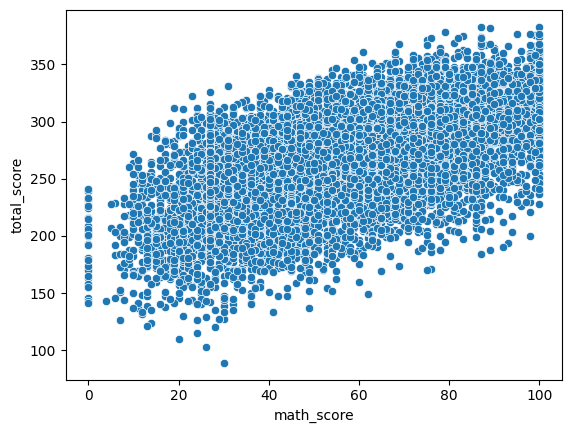

In [447]:
sns.scatterplot(x='math_score', y='total_score', data=df)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


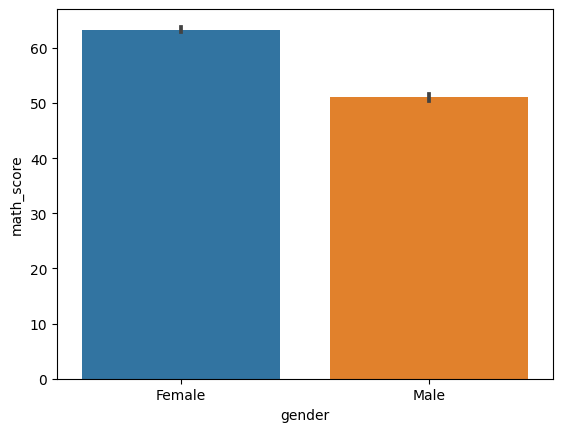

In [448]:
sns.barplot(x='gender', y='math_score', data=df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


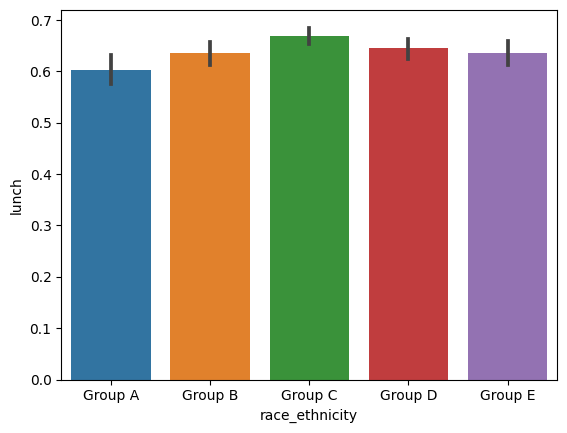

In [449]:
sns.barplot(x='race_ethnicity', y='lunch', data=df)
plt.show()

### Step 13: Feature Engineering
1. Create new features, if applicable
   o Example: Add a performance_ratio = total_score / max_score column3
2. Bin numeric columns into categories (e.g., "low", "medium", "high") using pd.cut().

In [450]:
df['performance_ratio'] = df['total_score'] / df['total_score'].max()
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,performance_ratio
0,Male,Group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C,0.621410
1,Male,Group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A,0.856397
2,Male,Group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B,0.689295
3,Male,Group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D,0.516971
4,Male,Group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C,0.556136


In [451]:
df['math_score_bins'] = pd.cut(df['math_score'], bins=[0, 50, 75, 100], labels=["low", "medium", "high"])
df['science_score_bins'] = pd.cut(df['science_score'], bins=[0, 50, 75, 100], labels=["low", "medium", "high"])
df['total_score_bins'] = pd.cut(df['total_score'], bins=[0, 200, 300, 400, 500], labels=["very low", "low", "medium", "high"])
df['reading_score_bins'] = pd.cut(df['reading_score'], bins=[0, 50, 75, 100], labels=["low", "medium", "high"])
df['writing_score_bins'] = pd.cut(df['writing_score'], bins=[0, 50, 75, 100], labels=["low", "medium", "high"])
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade,performance_ratio,math_score_bins,science_score_bins,total_score_bins,reading_score_bins,writing_score_bins
0,Male,Group D,some college,1.0,1.0,89.0,38.0,85.0,26.0,238.0,C,0.621410,high,low,low,low,high
1,Male,Group B,high school,1.0,0.0,65.0,100.0,67.0,96.0,328.0,A,0.856397,medium,high,medium,high,medium
2,Male,Group C,master's degree,1.0,0.0,10.0,99.0,97.0,58.0,264.0,B,0.689295,low,medium,low,high,high
3,Male,Group D,some college,1.0,1.0,22.0,51.0,41.0,84.0,198.0,D,0.516971,low,high,very low,medium,low
4,Male,Group C,some college,0.0,1.0,26.0,58.0,64.0,65.0,213.0,C,0.556136,low,medium,low,medium,medium
